# Recap: $f$-divergences:
Last week we saw how [1] generalized Generative Adversarial Networks (GANs) to approximately minimize any $f$-divergence. Concretely, theorem 1 of [1] gave assumptions for which how we can approximately minimize 

$$D_f(p_d || p_g) = \int_x p_g(x) f\left(\frac{p_d(x)}{p_g(x)}\right) dx$$

by playing the following GAN game

$$\text{min}_g\; \text{max}_T \;\mathbb{E}_{x\sim p_d}[T(x)] - \mathbb{E}_{z\sim p_z}[f^*(T(G(z)))]$$

Here $f^*$ is the complex conjungate. 

By now we all realize how amazing and lovable the f-divergences are. Unfortunately, just below we explain a problem suffered by most $f$-divergences as shown in [2]. To make matters concrete we will use the $KL$ divergence which is the special case of $f$ divergences where $f(x)=x \log x$. 

$$
\begin{align}
D_{kl}(p_d||p_g)&= \int_x p_g(x) \frac{p_d(x)}{p_g(x)} \;\log\left(\frac{p_d(x)}{p_g(x)}\right) dx\\
&= \int_x p_d(x) \;\log\left(\frac{p_d(x)}{p_g(x)}\right) dx\\
&=\mathbb{E}_{x\sim p_d}\left[\log{\left(\frac{p_d(x)}{p_q(x)}\right)}\right]
\end{align}
$$

<hr>
<b>Example 1: </b> (Uniform Distribution)<br>
In [2] they give an example with two uniform distributions that have no overlap, explain how they are, problem;

....

...

...

...

<b>Example 2: </b>(Normal Distribution)<br>
The KL divergence of normal distributions have a closed form given below: 

<b>Lemma: </b> Let $p=N(0,1)$ and $q=N(\mu, 1)$ then $D_{kl}(p||q) = \frac{\mu^2}{2}$. 

<b>Proof: </b> Substitute $\sigma_1=\sigma_2=1$ and $\mu_1=1$ in the formula derived by [3].

The code below visualizes how the KL divergence of $N(0,1)$ and $N(\mu, 1)$ increase with $\mu$ by using the above Lemma. 

<img src="gifs/normal_kl/gif.gif" />

The code used to create the gif is deferred to the end of this notebook. 






https://stats.stackexchange.com/questions/83741/earth-movers-distance-emd-between-two-gaussians

<hr>


# Moving Earth
Consider the following generated distribution $p_g$ which we want to turn into $p_d$: 

<img src="figs/earth_mover_example.png" />

We need to define some measure of distance between these two distributions. Since we usually define $p_g$ by transforming some sorce of randomnes $p_z$ by using $G$, it might be meaningful to define our measure as "how much we need to change $p_g$ to obtain $p_d$". Intuitively, you can think of $p_g$ and $p_d$ above as piles of earth. One possible distance measure between these two "piles of earth" is then how much work we need to perform to turn the first pile of earth into the other pile. 

Let $\gamma(x,y)$ denote a plan for how we want to move the earth. For example, $\gamma(1,4)=3$ means we move $3$ units of earth from $p_g$ at $x=1$ to $x=4$. If we also let $\gamma(2,3)=1$ our plan would have succesfully transformed $p_d$ into $p_g$. 

<img src="gifs/transport_plan/gif.gif" />

Furthermore, we add a cost $c(x,y)$ that tells us how much it costs to transport earth from $x$ to $y$; for example we could have $c(x,y)=||x-y||_2^2$. The total cost for a plan $\gamma$ is then given

$$\sum_{x,y}\gamma(x,y) c(x,y)$$

Since there are many plans, we choose the distance to be the optimal plan, namely, the one that transports the earth most cost effectively

$$EM(p_d, p_g)=\min_\gamma \; \sum_{x,y} \gamma(x,y)c(x,y)$$

But we are only interested in plans $\gamma$ that transform $p_g$ into $p_d$. To satisfy this constraint, we require that all plans $\gamma$ must satisfy the following: 

$$ \sum_{m} \gamma(m, x) = p_d(x) \quad\quad \sum_{m} \gamma(x, m)=p_g(x)$$

The first requirement ensures that all earth moved to $x$ sums up to the amount $p_d$ has at position $x$, that is, it ensures that the outcome of the plan is $p_d$. The second requirement ensures that everything moved away from $p_g$ at position $x$ is exactly how much $p_g$ has a position $x$ (notice that $\gamma(1,1)=1$ in our above example). 

The above constraints mean that $\gamma$ should marganilize into $p_d$ or $p_g$ depending on which variable we marginalize over. If we let $P[p_d, p_g]$ denote the set of joint probability distributions that marginalizes to $p_d$ and $p_g$, we get that 

$$
\begin{align}
EM(p_d, p_g)&=\min_{\gamma \in P[p_d, p_g]}\; \sum_{x,y} \gamma(x,y)c(x,y)\\
&=\min_{\gamma \in P[p_d, p_g]}\; \mathbb{E}_{(x,y)\sim \gamma}\left[c(x,y) \right]
\end{align}
$$

If we let $c(x,y)=||x-y||$ and consider continous distributions $p_d$ and $p_g$ we obtain the Wasserstein distance

$$
\begin{align}
W(p_d, p_g)&=\inf_{\gamma \in P[p_d, p_g]}\; \mathbb{E}_{(x,y)\sim \gamma}\left[||x-y||\right]
\end{align}
$$

# Explaining Theorem 1 and Corollary 2
We explain libschitz later in the end of this section: 

<b>Theorem 1. </b>Let $x_1,...,x_n\sim p_d$ and $z\sim p_z$ so $p_g$ denotes implicit distribution defined by $g_\Theta(z)$ where $\Theta$ are the weights of $g$. Then
1. If $g$ is continous in $\Theta$ then $W(p_d, p_g)$ is continous in $\Theta$. 
2. If $g$ is also Lipschitz then $W(p_d, p_g)$ is also differentiable almost everywhere. 
3. The above statements are not true for the JS and KL divergence. 

In Machine Learning we often frame our problems as optimization problems and minimize error/loss by some variant of gradient descent. For this to be succesfull, we'd like our error/loss to be differentiable (and thus continuous). Sometimes (as with relu non-linearity) we settle for piecewise differentiable. 

In example 1 above we saw that the KL divergence is undefined in all but one point, so this is not differentiable, it is not even continous. The takeway from Theorem 1 is that the Wasserstein GAN (under fitting assumptions) is both continous in the model parameretes and differentiable "<a href="https://en.wikipedia.org/wiki/Almost_everywhere">almost everywhere</a>", which JS and KL is not. This provides a strong theoretical justification for using the EM distance instead of JS or KL. 

<b>Open Problem: </b> Does all $f$-divergences have this problem? 

The generator is implemented as a neural network, one might ask if Neural Networks satisfy the wanted properties? The following corollary gives a positive answer to this question: 

<b>Corollary 1. </b> Feed Forward Neural Networks with $p_z$ that has bounded expectation satisfies asummption 1 and therefore Wasserstein is continuous everywhere and differentiable almost everywhere.  


## When is a function $L$-libschitz?

<b>Definition: </b> A function $f:\mathcal{X}\rightarrow \mathbb{R}$ is $L$-libschitz if $$\forall x,y\in \mathcal{X}: \quad \frac{||f(x)-f(y)||}{||x-y||}\le L$$

Consider for example a linear function $f(x)=Wx$ where $W$ is invertible and thus has all non-zero eigenvalues. We then get that 

$$||f(x)-f(y)||/||x-y|| = ||W(x-y)||/||x-y||$$

A linear transform can not increase the norm of a vector by more than its maximal eigenvalue. Since $(x-y)$ is a vector, we get that $||W(x-y)||\le \lambda_{max}(W)||x-y||$ and thus see that

$$||W(x-y)||/||x-y|| \le \lambda_{max}$$

It thus follows that linear transforms that have all non-zero eigenvalues has the libschitz constant $\lambda_{max}(W)$. 

# How do we actually minimize Earth Mover? Seems intractable. 
Ok. So we introduce the earth mover distance: 

$$
\begin{align}
W(p_d, p_g)&=\inf_{\gamma \in P[p_d, p_g]}\; \mathbb{E}_{(x,y)\sim \gamma}\left[||x-y||\right]
\end{align}
$$

Furthermore, we saw a theorem that showed that the earth mover distance has nicer properties than JS and KL. But the above distance looks intractable, how could we compute this function? Fortunately, Kantorovich and Rubinstein manages to show that the Wasserstein distance can be computed as

$$
\begin{align}
W(p_d, p_g)&=\sup_{||f||_L \le 1}\; \mathbb{E}_{x\sim p_d}\left[f(x)\right] - \mathbb{E}_{x\sim p_g}\left[f(x)\right]
\end{align}
$$

where $||f||_L\le 1$ means that $f$ has a libschitz constant $1$. Since we only care about minimizing $W$ (actually we only care about gradients of $W$), changing the constraint to $||f|_L\le k$ doesn't change much, the gradient will be scaled by a factor $k$ (is this accurate?). Thus, if we consider a limited family of function $F$ that are all $K$-lipschitz for some $K$ minimizing over this set of functions minimize the aboev up to a constant factor. 

We would like our set of functions $F$ to be specified by a specific Neural Network architecture. To make sure this family of neural networks has a bounded libschitz constant, we could just clip the weights of each layer. Intuitively, if we consider a single layer, its maximum eigenvalue must be bounded; if one accepts this holds under composition with non-linearities (highly nontrivial), we would get that weight clipping constrains the family to have a bounded libschitz constant. 

A "theoretically cleaner" approach was later introduced by [4] who suggest spectral normalization. This techniuque is the topic of week 4. 

# Code for moving normal distributions


In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm

def kl_div(mu1, std1, mu2, std2): 
    #..https://stats.stackexchange.com/questions/7440/kl-divergence-between-two-univariate-gaussians
    return np.log(std1 / std2) + (std1**2 + (mu1 - mu2)**2) / (2*std2**2) - 1/2

# compute kl divergence between N(0, 1) and N(mu, 1) as mu increase. 
xs = np.arange(0,  30, 1)
xs_ = np.arange(-5, 30, 0.1)
ys = kl_div(0, 1, xs, 1)

plt.ion()
fig, ax = plt.subplots(1, 2, figsize=(10,3))
#ax.set_xlabel("increasing mean")
fig.suptitle('KL of N(0, 1) and Moving Normal Distribution', fontsize=12)

# plot it moving from left to right. 
for i in range(0, 15):     
    ax[0].cla()
    ax[1].cla()
    ax[0].plot(xs_, norm.pdf(xs_, 0, 1), label="N(0, 1)", alpha=0.3, lw=4)
    ax[0].plot(xs_, norm.pdf(xs_, 0+i, 1), label="N(%i, 1)"%int(i), alpha=0.3)
    ax[1].plot(xs[:i], ys[:i], label="KL")
    ax[0].plot([-5, 20], [ys[i], ys[i]], label="KL")
    ax[0].set_yscale('log')
    ax[0].set_ylim([0.1, 1000])
    ax[1].set_ylim([0, 100])
    ax[1].set_xlim([0, 20])
    ax[0].set_xlim([-5, 20])
    ax[0].legend(loc=1)
    ax[1].legend(loc=1)
    plt.savefig("gifs/normal_kl/%i.png"%i)
    fig.canvas.draw()
    plt.pause(.1)
    
for i in range(15, -1, -1):
    ax[0].cla()
    ax[1].cla()
    ax[0].plot(xs_, norm.pdf(xs_, 0, 1), label="N(0, 1)", alpha=0.3, lw=4)
    ax[0].plot(xs_, norm.pdf(xs_, 0+i, 1), label="N(%i, 1)"%int(i), alpha=0.3)
    ax[1].plot(xs[:i], ys[:i], label="KL")
    ax[0].plot([-5, 20], [ys[i], ys[i]], label="KL")
    ax[0].set_yscale('log')
    ax[0].set_ylim([0.1, 1000])
    ax[1].set_ylim([0, 100])
    ax[1].set_xlim([0, 20])
    ax[0].set_xlim([-5, 20])

    ax[0].legend(loc=1)
    ax[1].legend(loc=1)
    plt.savefig("gifs/normal_kl/%i.png"%(30-i))
    fig.canvas.draw()
    plt.pause(.1)


<IPython.core.display.Javascript object>


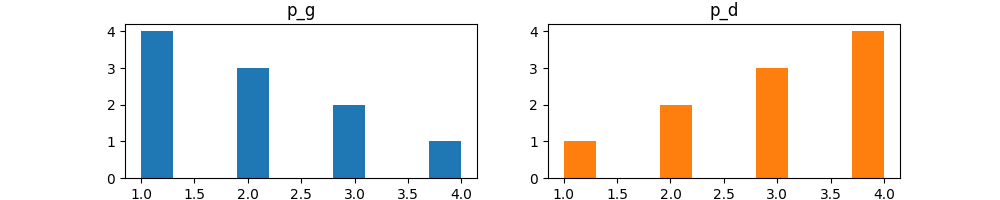

[]

In [60]:
import matplotlib.pyplot as plt

p_g = np.array([1,1,1,1,2,2,2,3,3,4])
p_d = np.array([1,2,2,3,3,3,4,4,4,4])

fig, ax = plt.subplots(1, 2, figsize=(10,2))
ax[0].hist(p_g, color="C0")
ax[0].set_title("p_g")
ax[1].hist(p_d, color="C1")
ax[1].set_title("p_d")
plt.savefig("figs/earth_mover_example.png")
plt.plot()

<IPython.core.display.Javascript object>


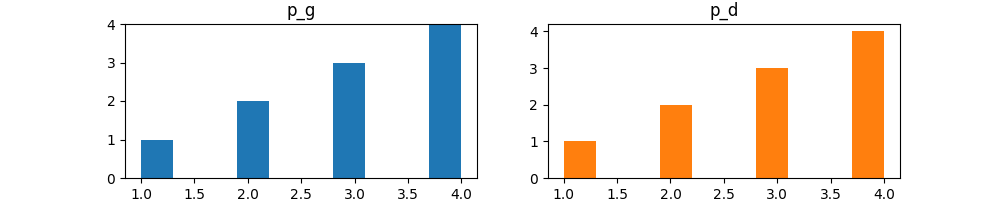

In [61]:
import matplotlib.pyplot as plt

plt.ion()
fig, ax = plt.subplots(1, 2, figsize=(10,2))

p_g = np.array([1,1,1,1,2,2,2,3,3,4])
p_d = np.array([1,2,2,3,3,3,4,4,4,4])

ax[0].cla()
ax[0].hist(p_g, color="C0")
ax[0].set_title("p_g")
ax[1].hist(p_d, color="C1")
ax[1].set_title("p_d")
ax[0].set_ylim([0,4])
plt.savefig("gifs/transport_plan/0.png")
fig.canvas.draw()
plt.pause(1)

p_g = np.array([1, 2,2,2,3,3,4])
p_d = np.array([1,2,2,3,3,3,4,4,4,4])

ax[0].cla()
ax[0].hist(p_g, color="C0")
ax[0].set_title("p_g")
ax[1].hist(p_d, color="C1")
ax[1].set_title("p_d")
ax[0].set_ylim([0,4])
plt.savefig("gifs/transport_plan/1.png")
fig.canvas.draw()
plt.pause(1)

p_g = np.array([1,2,2,2,3,3,4,4,4,4])
p_d = np.array([1,2,2,3,3,3,4,4,4,4])

ax[0].cla()
ax[0].hist(p_g, color="C0")
ax[0].set_title("p_g")
ax[1].hist(p_d, color="C1")
ax[1].set_title("p_d")
ax[0].set_ylim([0,4])
plt.savefig("gifs/transport_plan/2.png")
fig.canvas.draw()
plt.pause(1)

p_g = np.array([1,2,2,3,3,4,4,4,4])
p_d = np.array([1,2,2,3,3,3,4,4,4,4])

ax[0].cla()
ax[0].hist(p_g, color="C0")
ax[0].set_title("p_g")
ax[1].hist(p_d, color="C1")
ax[1].set_title("p_d")
ax[0].set_ylim([0,4])
plt.savefig("gifs/transport_plan/3.png")
fig.canvas.draw()
plt.pause(1)

p_g = np.array([1,2,2,3,3,3,4,4,4,4])
p_d = np.array([1,2,2,3,3,3,4,4,4,4])

ax[0].cla()
ax[0].hist(p_g, color="C0")
ax[0].set_title("p_g")
ax[1].hist(p_d, color="C1")
ax[1].set_title("p_d")
ax[0].set_ylim([0,4])
plt.savefig("gifs/transport_plan/4.png")
fig.canvas.draw()
plt.pause(1)

# References 
[3] https://stats.stackexchange.com/questions/7440/kl-divergence-between-two-univariate-gaussians